# Deep Unfolding approaches

The aim of this notebook is to present an example of using one of our models based on Deep Unfolding Learning, called `SORNet`, and to compare it with its conventional counterpart, `SOR`.

For more details about these approaches, see the [documentation](https://Salahberra2022.github.io/deep_unfolding/).

We start by importing everything we need. From `unfolding_linear`, we import: 

- A device, to indicate where we're going to run our program (CPU or GPU), and the `generate_A_H_sol()` function to generate a $Ax=b$ problem with random matrices of a size we define.
- The model we want to evaluate, `SORNet`, as well as the functions for training it and evaluating it, , `train_model()` and `evaluate_model()`, respectively.
- The equivalent classic iterative approach, namely `SOR`.

In [9]:
from unfolding_linear import (
    # From utils module
    device,
    generate_A_H_sol,
    # From train_methods module
    train_model,
    evaluate_model,
    SORNet,
    # From methods module
    model_iterations,
    SOR
)

import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim

In [10]:
total_itr = 5  # Total number of iterations (multiple of "itr")
n = 300  # Number of rows
m = 600  # Number of columns
seed = 12 # Seed for the random generator
bs = 10000  # Mini-batch size (samples)
num_batch = 500  # Number of mini-batches
lr_adam = 0.002  # Learning rate of optimizer
init_val_SORNet = 1.1  # Initial value of omega for SORNet

A, H, W, solution, y = generate_A_H_sol(n=n, m=m, seed=seed, bs=bs)


    - Condition number of A: 30.82875247502449 
    - Min eigenvalue of A: 0.1841907356798616
    - Max eigenvalue of A: 5.678370598467115


### Deep Unfolding model

In [11]:
# SORNet model
model_SorNet = SORNet(A, H, bs, y, init_val_SORNet, device=device)

# Loss function and Optimizer
loss_func = nn.MSELoss()
opt_SORNet = optim.Adam(model_SorNet.parameters(), lr=lr_adam)

In [12]:
trained_model_SorNet, loss_gen_SORNet = train_model(model_SorNet, opt_SORNet, loss_func, solution, total_itr, num_batch)

generation: 1  batch: 0 	 MSE loss: 0.21353216469287872
generation: 1  batch: 200 	 MSE loss: 0.16339515149593353
generation: 1  batch: 400 	 MSE loss: 0.15610463917255402
generation: 2  batch: 0 	 MSE loss: 0.09626054018735886
generation: 2  batch: 200 	 MSE loss: 0.09181495010852814
generation: 2  batch: 400 	 MSE loss: 0.08565113693475723
generation: 3  batch: 0 	 MSE loss: 0.044656503945589066
generation: 3  batch: 200 	 MSE loss: 0.034238796681165695
generation: 3  batch: 400 	 MSE loss: 0.03343173488974571
generation: 4  batch: 0 	 MSE loss: 0.014115295372903347
generation: 4  batch: 200 	 MSE loss: 0.013077517971396446
generation: 4  batch: 400 	 MSE loss: 0.013077519834041595
generation: 5  batch: 0 	 MSE loss: 0.005124955903738737
generation: 5  batch: 200 	 MSE loss: 0.0049643851816654205
generation: 5  batch: 400 	 MSE loss: 0.0049643851816654205


In [13]:
norm_list_SORNet = evaluate_model(trained_model_SorNet, solution, n, bs, total_itr, device=device)

### Conventional approach

In [14]:
SOR_model = SOR(n = n, A = A, H = H, bs = bs, y = y, omega = 1.8)

In [15]:
s_hat_SOR, norm_list_SOR = model_iterations(total_itr = total_itr, n = n, bs = bs, model = SOR_model, solution = solution)

## Performance comparison

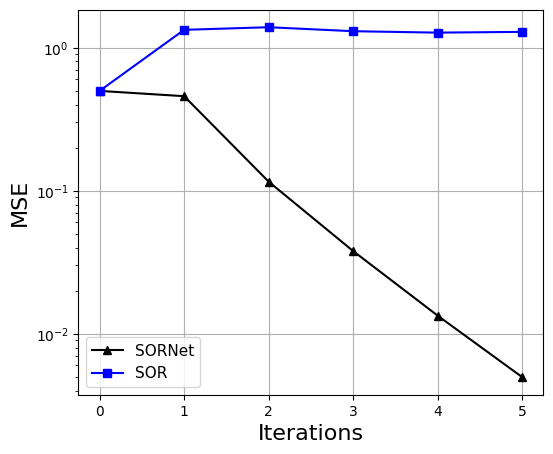

In [16]:
norm_list = [norm_list_SORNet, norm_list_SOR]
methods = ["SORNet", "SOR"]
marker_list = ['^k-', 'sb-']

itr_list = list(range(total_itr + 1))
plt.figure(figsize=(6,5))
for k, iterative in enumerate(norm_list):
    plt.semilogy(itr_list, iterative, marker_list[k], label=methods[k])
    plt.grid("True")
plt.legend(fontsize=11)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.yscale('log')
plt.show()